NAME : MIRZA NURIA HUSNA STUDENT ID : 1101220022 HOMEWORK : 5

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [45]:
df = pd.read_csv("1.csv")
df.head()

,0,1502,2215,2153,1
0,1.0,1667,2072,2047,1
1,2.0,1611,1957,1906,1
2,3.0,1601,1939,1831,1
3,4.0,1643,1965,1879,1
4,5.0,1604,1959,1921,1


In [49]:
print(df.columns)


Index(['0', '1502', '2215', '2153', '1'], dtype='object')


In [57]:
df = pd.read_csv("1.csv", header=None)
print(df.head())
print(df.iloc[:5])

     0     1     2     3  4
0  0.0  1502  2215  2153  1
1  1.0  1667  2072  2047  1
2  2.0  1611  1957  1906  1
3  3.0  1601  1939  1831  1
4  4.0  1643  1965  1879  1
     0     1     2     3  4
0  0.0  1502  2215  2153  1
1  1.0  1667  2072  2047  1
2  2.0  1611  1957  1906  1
3  3.0  1601  1939  1831  1
4  4.0  1643  1965  1879  1


In [59]:
df = pd.read_csv("1.csv", header=None)

df.columns = ['Time', 'Ax', 'Ay', 'Az', 'Activity']

print(df.head())


   Time    Ax    Ay    Az  Activity
0   0.0  1502  2215  2153         1
1   1.0  1667  2072  2047         1
2   2.0  1611  1957  1906         1
3   3.0  1601  1939  1831         1
4   4.0  1643  1965  1879         1


In [61]:
df['Am'] = np.sqrt(df['Ax']**2 + df['Ay']**2 + df['Az']**2)
#menghitung magnitudo akselerasi

In [63]:
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def apply_filter(data, cutoff, fs, filter_type='low'):
    if filter_type == 'low':
        b, a = butter_lowpass(cutoff, fs)
    else:
        b, a = butter_highpass(cutoff, fs)
    return filtfilt(b, a, data)


In [69]:
def apply_filter(data, cutoff, fs, filter_type='low'):
    if len(data) < 15:  # Cek apakah data cukup panjang
        print(f"⚠ Data terlalu pendek untuk filtering (panjang: {len(data)}), dilewati!")
        return data  # Kembalikan data asli tanpa filter

    if filter_type == 'low':
        b, a = butter_lowpass(cutoff, fs)
    else:
        b, a = butter_highpass(cutoff, fs)

    return filtfilt(b, a, data)


In [71]:
for activity, df_act in filtered_data.items():
    print(f"Activity: {activity}")
    print(df_act.head())  # Lihat 5 baris pertama dari hasil filtering


Activity: 1
   Time    Ax    Ay    Az  Activity           Am       Ax_low     Ax_high  \
0   0.0  1502  2215  2153         1  3434.768988  1502.834355   -0.834356   
1   1.0  1667  2072  2047         1  3355.932359  1506.929075  160.070925   
2   2.0  1611  1957  1906         1  3171.435952  1511.021142   99.978858   
3   3.0  1601  1939  1831         1  3110.543843  1515.103580   85.896420   
4   4.0  1643  1965  1879         1  3176.683018  1519.169412  123.830588   

        Ay_low     Ay_high       Az_low     Az_high       Am_low     Am_high  
0  2219.751553   -4.751553  2158.785322   -5.785323  3442.754173   -7.985186  
1  2211.009160 -139.009161  2151.532544 -104.532544  3434.719057  -78.786698  
2  2202.229751 -245.229751  2144.377922 -238.377922  3426.719809 -255.283857  
3  2193.427690 -254.427690  2137.335984 -306.335984  3418.771013 -308.227170  
4  2184.617463 -219.617463  2130.420935 -251.420935  3410.887124 -234.204106  
Activity: 2
          Time    Ax    Ay    Az  Activ

In [77]:
print("Filtered Data Keys:", filtered_data.keys())
print("Activities:", activities)


Filtered Data Keys: dict_keys([1, 2, 3, 4, 5, 6, 7])
Activities: [1 2 3 4 5 6 7 0]


Skipping Activity 0 as it's not in filtered_data


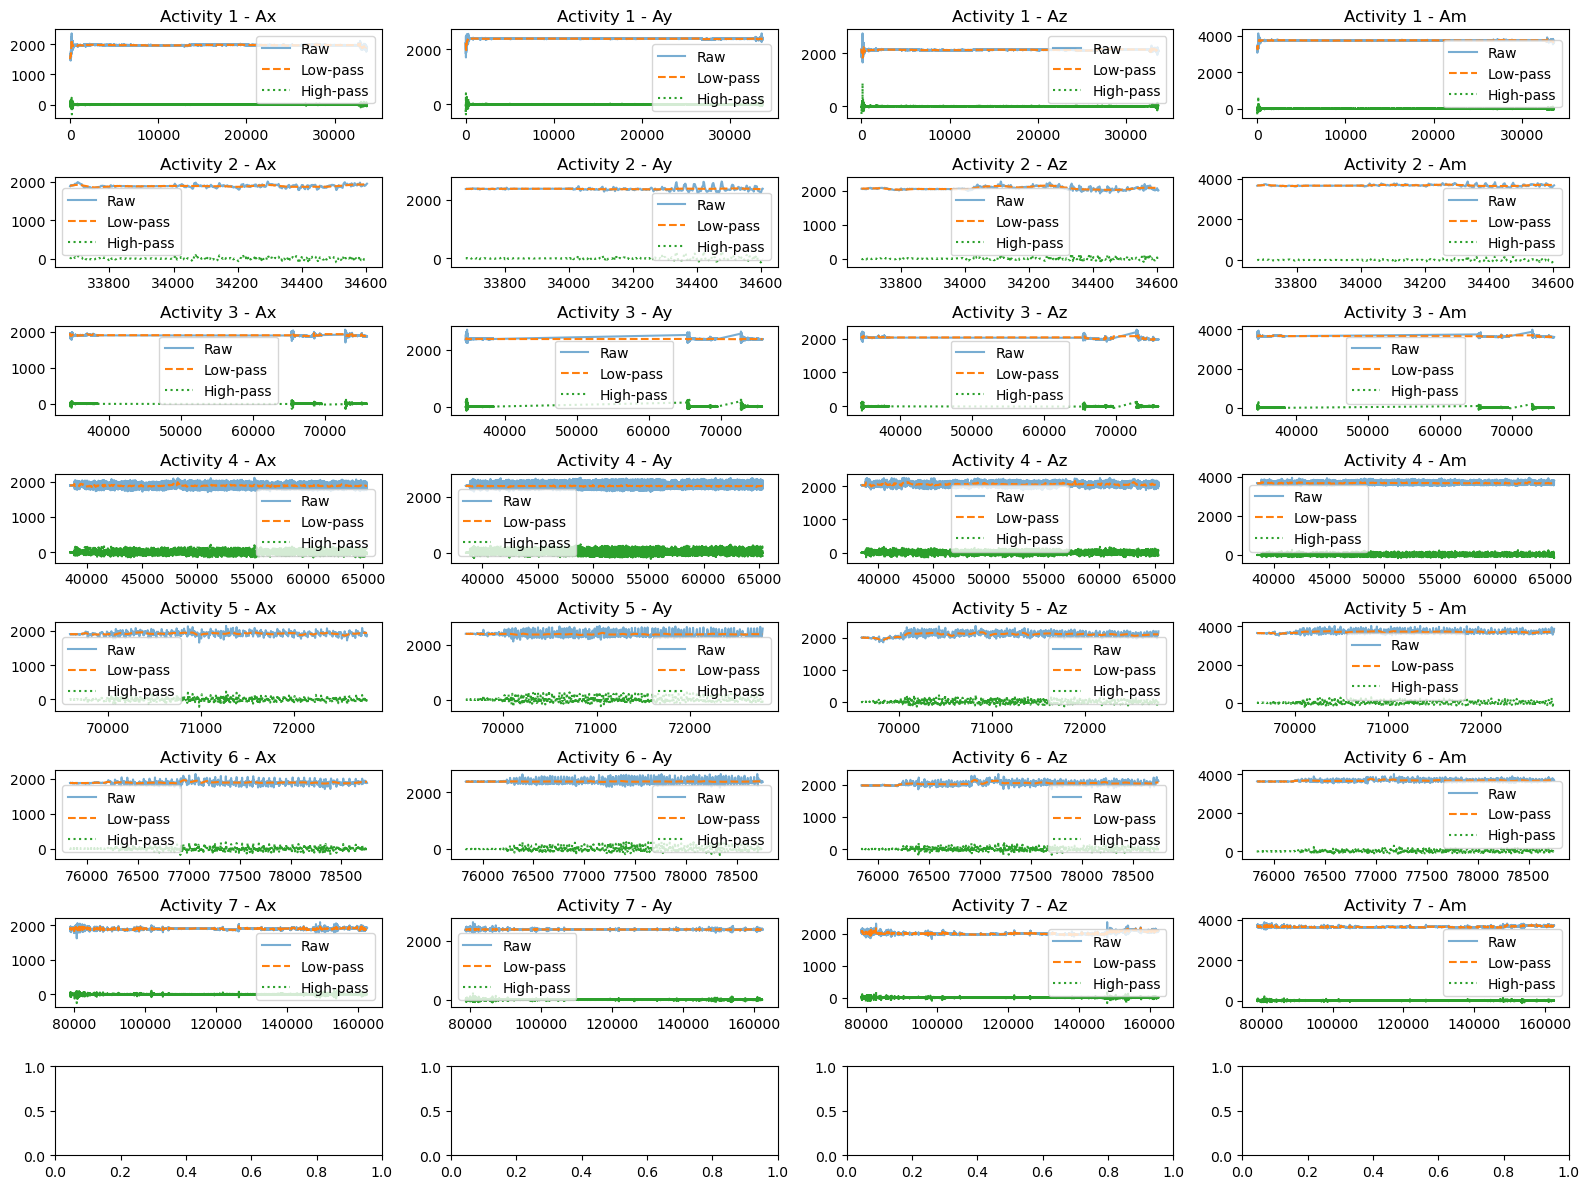

In [79]:
fig, axes = plt.subplots(len(activities), 4, figsize=(16, 12), squeeze=False)

for i, activity in enumerate(activities):
    if activity in filtered_data:  # Hanya proses jika activity ada
        df_act = filtered_data[activity]
        for j, axis in enumerate(['Ax', 'Ay', 'Az', 'Am']):
            if axis in df_act.columns:
                axes[i, j].plot(df_act.index, df_act[axis], label='Raw', alpha=0.6)
                axes[i, j].plot(df_act.index, df_act[f'{axis}_low'], label='Low-pass', linestyle='dashed')
                axes[i, j].plot(df_act.index, df_act[f'{axis}_high'], label='High-pass', linestyle='dotted')
                axes[i, j].set_title(f'Activity {activity} - {axis}')
                axes[i, j].legend()
            else:
                print(f"Warning: Column {axis} not found in activity {activity}")
    else:
        print(f"Skipping Activity {activity} as it's not in filtered_data")

plt.tight_layout()
plt.show()
